# Проект: классификация

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#data= pd.read_csv("./drive/MyDrive/CC GENERAL.csv")
df = pd.read_csv('./drive/MyDrive/bank_fin.csv', sep = ';')
print(df.shape)
df.head(10)

Mounted at /content/drive
(11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0 $,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,"830,00 $",yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,"545,00 $",yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,"1,00 $",yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,NaN,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [ ]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
info = pd.DataFrame(df.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df.isna().sum(),True)
info.insert(2,"Duplicate",df.duplicated().sum(),True)
info.insert(3,"Unique",df.nunique(),True)
info.insert(4,"count",df.count(),True)
info.insert(4,"type",df.dtypes,True)
info.T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
IsNull,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0
Duplicate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Unique,76,12,3,4,2,3802,2,2,3,31,12,1428,36,472,34,4,2
type,int64,object,object,object,object,object,object,object,object,int64,object,int64,int64,int64,int64,object,object
count,11162,11162,11162,11162,11162,11137,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162


### Задание 2

In [ ]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
pd.unique(df['job']. values.ravel ())
#  unknown

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


### Задание 3

In [ ]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df['balance'] = df['balance'].str.replace(',00', '')
df['balance'] = df['balance'].str.replace(' ', '')
df['balance'] = df['balance'].str.replace('$', '')
df = df.astype({'balance': np.float})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df['balance'].apply(type).value_counts()
df['balance'].mean()

1529.1290293615875

### Задание 4

In [ ]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
df['balance']=df['balance'].fillna(df['balance'].median())
df['balance'].mean()

1526.9360329690019

### Задание 5

In [ ]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения


In [ ]:
df['job'] = df['job'].str.replace('unknown', 'management')
df['education'] = df['education'].str.replace('unknown', 'secondary')

In [ ]:
df['education'].value_counts()


secondary    5973
tertiary     3689
primary      1500
Name: education, dtype: int64

In [ ]:
df['job'].value_counts()

management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64

In [ ]:
mask1=df['job']=='management'
mask2=df['education']=='secondary'
df[mask1 & mask2].describe()



,age,balance,day,duration,campaign,pdays,previous
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,44.356383,1598.882979,16.295213,364.473404,2.699468,51.180851,0.835106
std,11.368992,2440.041545,8.663830,389.033393,4.023610,108.090008,2.124007
min,24.000000,-994.000000,1.000000,8.000000,1.000000,-1.000000,0.000000
25%,35.000000,171.000000,8.000000,121.750000,1.000000,-1.000000,0.000000
50%,44.000000,703.000000,17.000000,260.000000,2.000000,-1.000000,0.000000
75%,53.000000,2206.000000,23.000000,459.250000,3.000000,45.500000,1.000000
max,78.000000,19268.000000,31.000000,3881.000000,63.000000,683.000000,15.000000


### Задание 6

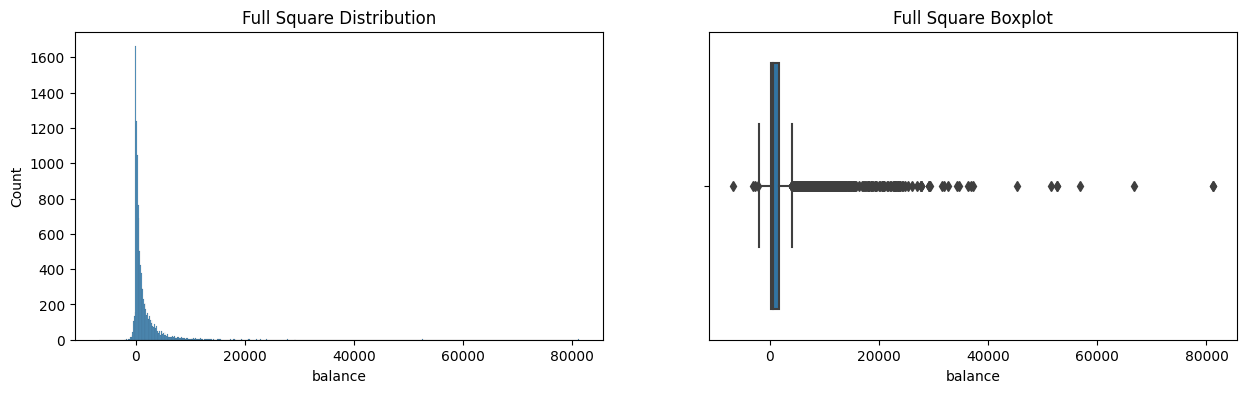

In [ ]:
#Метод Тьюки
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='balance', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=df, x='balance', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');

In [ ]:
# удалите все выбросы для признака balance
# ваш код

In [ ]:
def outliers_iqr(df, feature):
    x = df[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 + (iqr * -1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = df[(x < lower_bound) | (x > upper_bound)]
    df_cleaned = df[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, df_cleaned

In [ ]:
quartile_1 = df['balance'].quantile(0.25)
quartile_3 = df['balance'].quantile(0.75)
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 + (iqr * -1.5)
upper_bound = quartile_3 + (iqr * 1.5)
print(lower_bound, upper_bound)

-2241.0 4063.0


In [ ]:
outliers, df_cleaned = outliers_iqr(df, 'balance')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {df_cleaned.shape[0]}')

Число выбросов по методу Тьюки: 1057
Результирующее число записей: 10105


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10105 non-null  int64  
 1   job        10105 non-null  object 
 2   marital    10105 non-null  object 
 3   education  10105 non-null  object 
 4   default    10105 non-null  object 
 5   balance    10105 non-null  float64
 6   housing    10105 non-null  object 
 7   loan       10105 non-null  object 
 8   contact    10105 non-null  object 
 9   day        10105 non-null  int64  
 10  month      10105 non-null  object 
 11  duration   10105 non-null  int64  
 12  campaign   10105 non-null  int64  
 13  pdays      10105 non-null  int64  
 14  previous   10105 non-null  int64  
 15  poutcome   10105 non-null  object 
 16  deposit    10105 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


## Часть 2:  Разведывательный анализ

### Задание 1

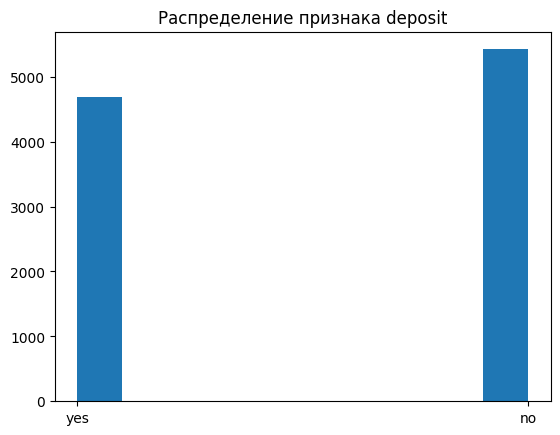

In [ ]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
plt.hist(df_cleaned.deposit)
plt.title('Распределение признака deposit');

In [ ]:
#sns.pairplot(data = df_cleaned)
#plt.show()

In [ ]:
df_cleaned['deposit'].value_counts()

no     5424
yes    4681
Name: deposit, dtype: int64

In [ ]:
df_cleaned['marital'].value_counts()

married     5715
single      3213
divorced    1177
Name: marital, dtype: int64

In [ ]:
df_cleaned.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


Попробуйте извлечь максимум информации из тех показателей, которые можете получить. Сколько всего сфер занятости представлено среди клиентов банка? В каждый ли месяц проходила маркетинговая кампания? Какое семейное положение встречается чаще всего? А образование? Постарайтесь дать достаточно подробную интерпретацию. Для лучшей наглядности добавьте визуализации по каждой категориальной переменной.

In [ ]:
temp_data = df_cleaned.copy()

In [ ]:
types = temp_data.dtypes
num_features = list(types[(types != 'object')].index)
num_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

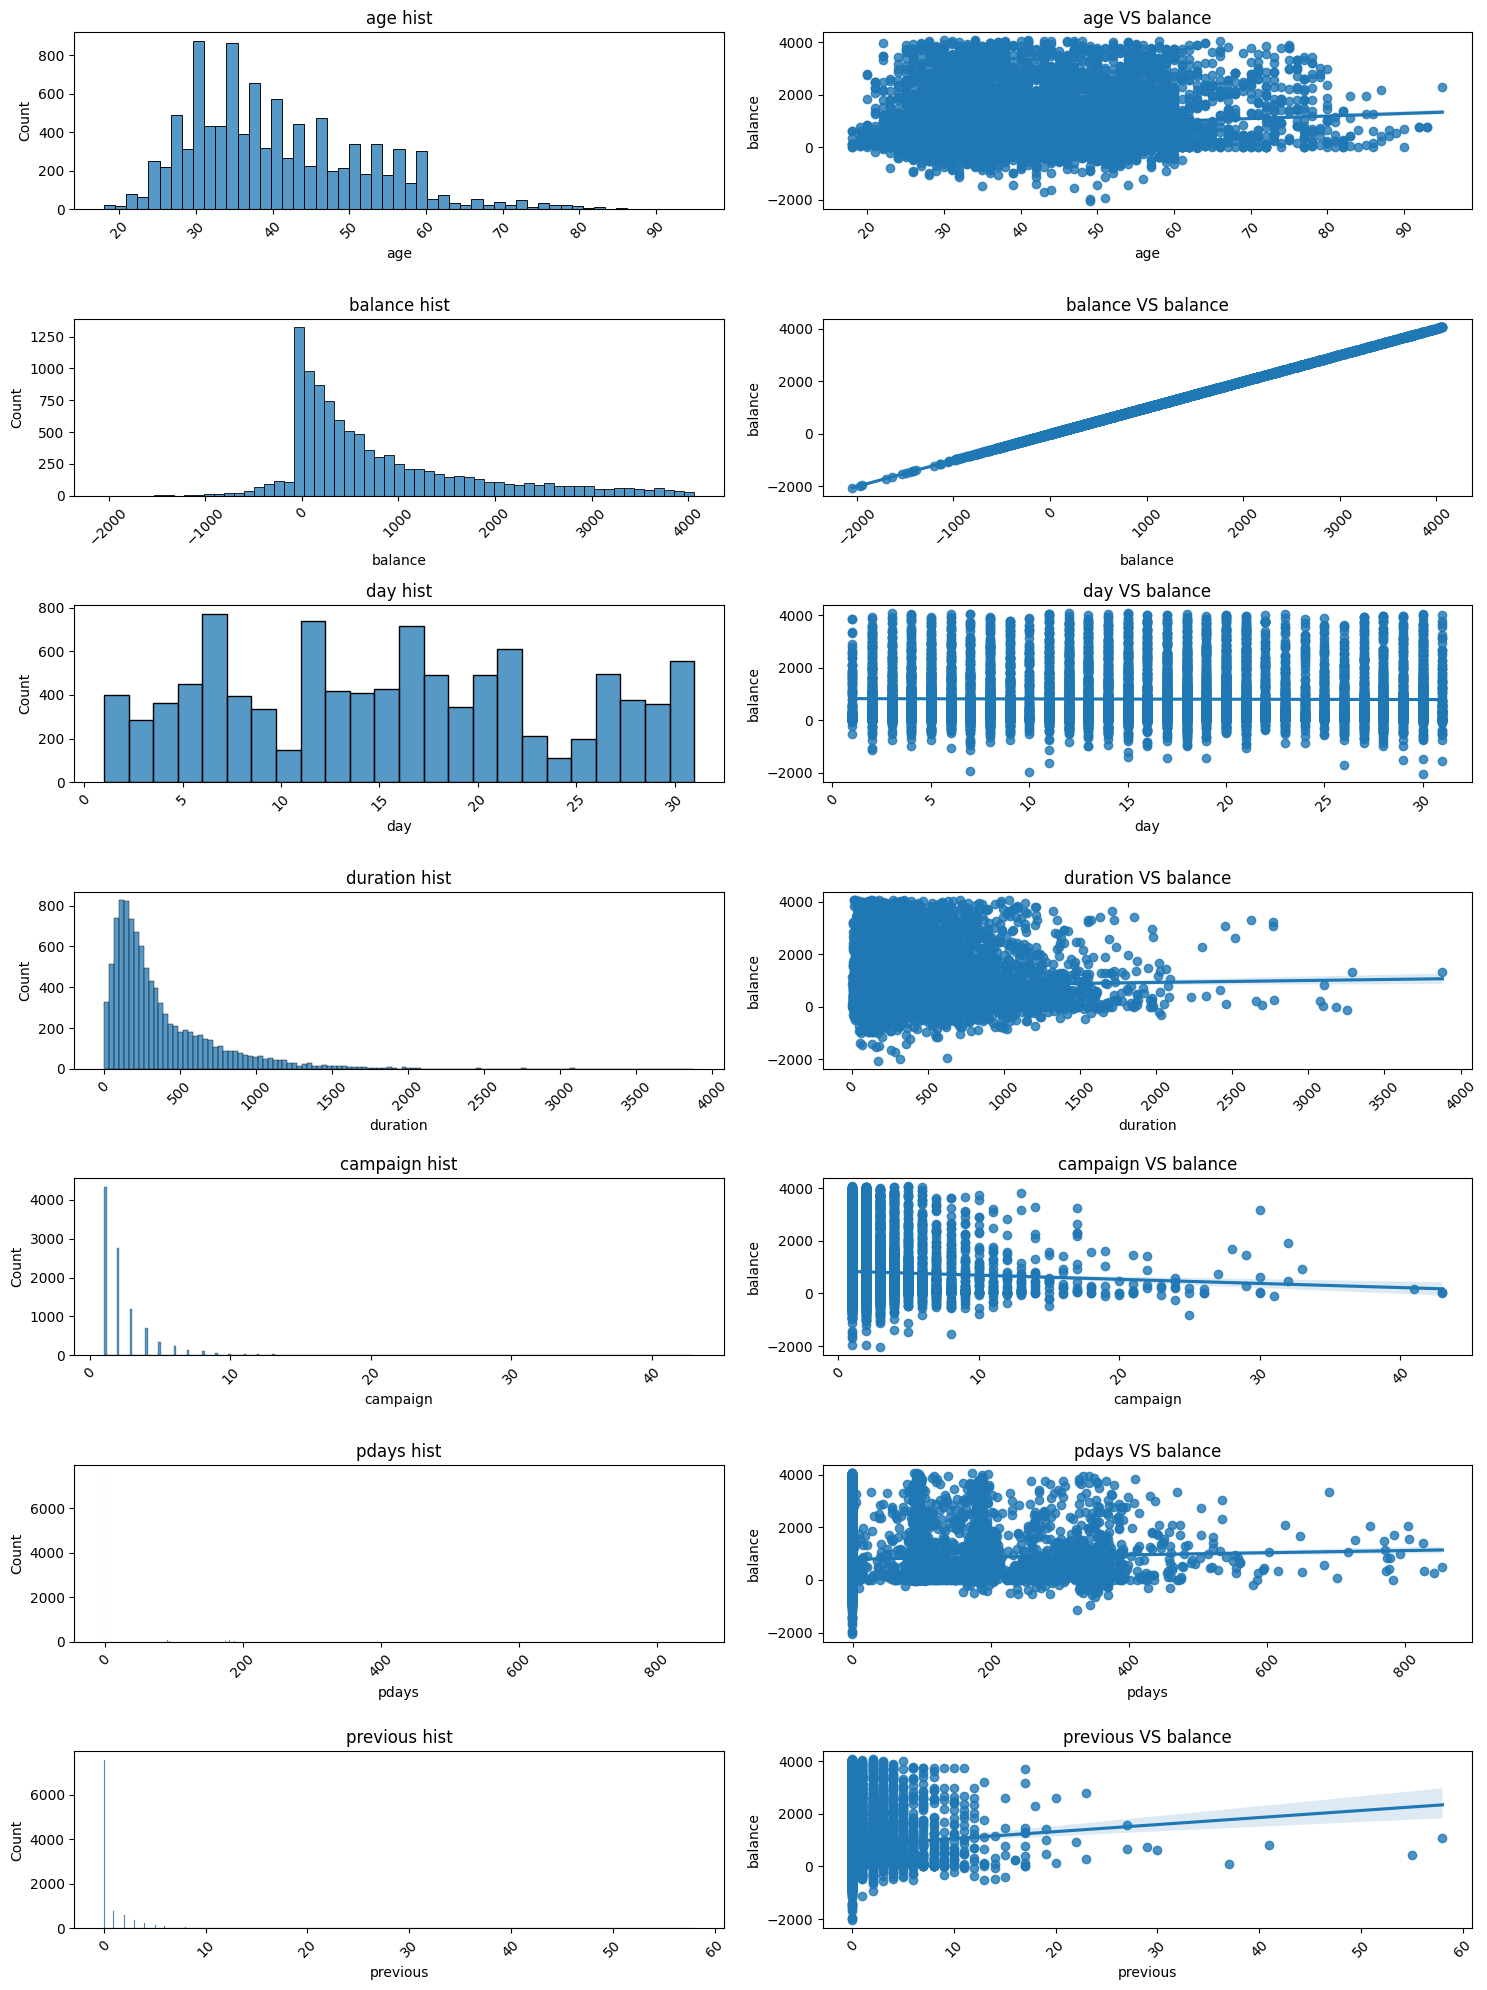

In [ ]:
n = len(num_features) #количество числовых признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 20)) # фигура + n х 2 координатных плоскостей
#Создаем цикл для всех признаков из списка числовых признаков
for i, feature in enumerate(num_features): #i- индекс, feature - название признака в таблице
    #Строим гистограмму распределения признака
    histplot = sns.histplot(data=temp_data, x=feature, ax=axes[i][0])
    #Добавляем подпись графику
    histplot.set_title('{} hist'.format(feature))
    #Добавляем поворот отметок на оси абсцисс
    histplot.xaxis.set_tick_params(rotation=45)
    #Строим диаграмму рассеяния + линейную регрессию
    regplot = sns.regplot(data=temp_data, x=feature, y='balance', ax=axes[i][1])
    #Добавляем подпись графику
    regplot.set_title('{} VS balance'.format(feature));
    #Добавляем поворот отметок на оси абсцисс
    regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout() #выравнивание графиков

In [ ]:
df_cleaned.groupby(by='poutcome').value_counts()

poutcome  age  job         marital   education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays  previous  deposit
failure   20   student     married   secondary  no       292.0    no       no    cellular   5    aug    385       2          93    1         yes        1
                           single    primary    no       0.0      no       no    cellular   1    feb    143       5          91    8         no         1
          35   technician  single    secondary  no       399.0    yes      no    cellular   13   may    496       2          345   3         yes        1
                           married   secondary  no       149.0    yes      no    cellular   29   jan    99        1          245   2         no         1
                                                         545.0    yes      no    cellular   16   apr    1579      1          234   4         yes        1
                                                                                 

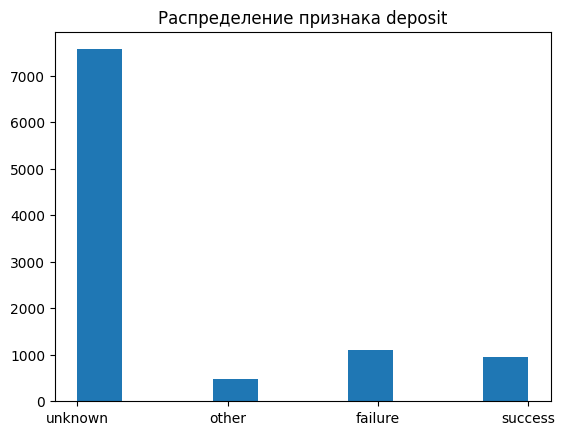

In [ ]:
plt.hist(df_cleaned.poutcome)
plt.title('Распределение признака deposit');

In [ ]:
df_cleaned.groupby(by='deposit').min()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
deposit,,,,,,,,,,,,,,,,
no,18,admin.,divorced,primary,no,-2049.0,no,no,cellular,1,apr,2,1,-1,0,failure
yes,18,admin.,divorced,primary,no,-1944.0,no,no,cellular,1,apr,8,1,-1,0,failure


In [ ]:
df_cleaned.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


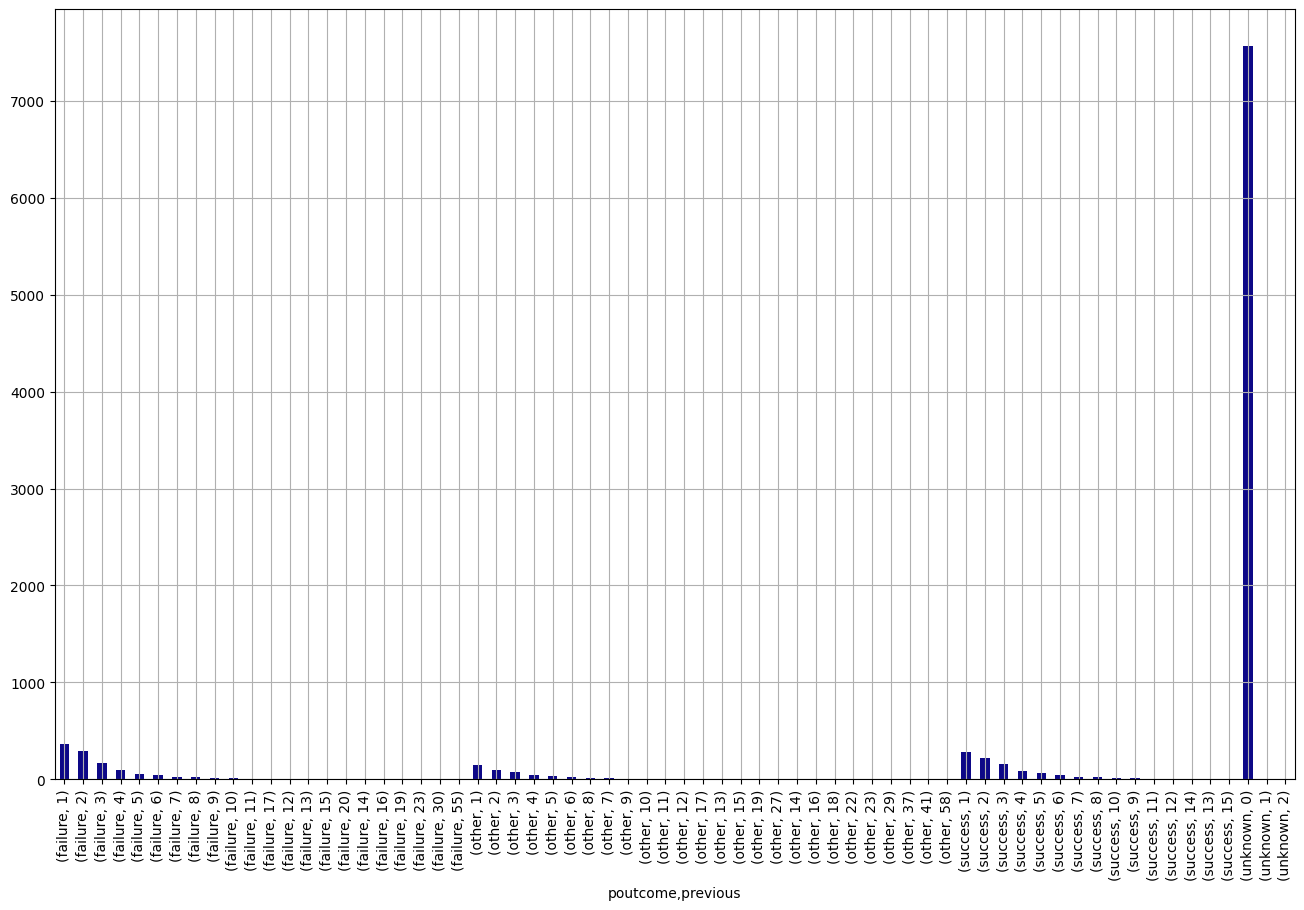

In [ ]:
grouped_df = df_cleaned.groupby(['poutcome'])['previous'].value_counts()
grouped_1 = grouped_df.nlargest(10)
grouped_df.plot(
    kind='bar',
    grid=True,
    figsize=(16, 10),
    colormap='plasma'
    );

### Задания 2 и 3

In [ ]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код

### Задания 4 и 5

In [ ]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты

### Задание 6

In [ ]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
df_cleaned.groupby('poutcome')['poutcome','deposit'].value_counts()

poutcome  deposit
failure   no          562
          yes         547
other     yes         265
          no          216
success   yes         861
          no           84
unknown   no         4562
          yes        3008
dtype: int64

### Задание 7

In [ ]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
mask3=df_cleaned['poutcome']=='failure'
df1=df_cleaned[mask3]
df1.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,1109,1109,1109,1109,1109,1109,1109,1109,1109,1109
unique,11,3,3,2,2,2,3,12,1,2
top,management,married,secondary,no,yes,no,cellular,may,failure,no
freq,260,645,617,1101,668,948,1035,335,1109,562


### Задание 8

In [ ]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
df_1 = df_cleaned.copy()
df_1['age'] = df_1['age'].apply(
lambda x: (x < 30 and '<30') or (x<40 and '30-40') or (x<50 and '40-50') or (x<60 and '50-60') or (x and '60+')
)

In [ ]:
mask4=df_1['poutcome']=='success'
df2=df_1[mask4]
df_3=df_1.groupby(['age'])['poutcome'].value_counts()
#df1.describe(include='object')

In [ ]:
df_3

age    poutcome
30-40  unknown     2954
       failure      486
       success      324
       other        197
40-50  unknown     1845
       failure      262
       success      173
       other        102
50-60  unknown     1290
       failure      173
       success      133
       other         58
60+    unknown      394
       success      152
       failure       71
       other         36
<30    unknown     1087
       success      163
       failure      117
       other         88
Name: poutcome, dtype: int64

### Задания 9 и 10

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
df_1.groupby(['marital'])['deposit'].value_counts()


marital   deposit
divorced  no          624
          yes         553
married   no         3303
          yes        2412
single    yes        1716
          no         1497
Name: deposit, dtype: int64

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
df_1.groupby(['education'])['deposit'].value_counts()

education  deposit
primary    no          832
           yes         517
secondary  no         3066
           yes        2451
tertiary   yes        1713
           no         1526
Name: deposit, dtype: int64

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
df_1.groupby(['job'])['deposit'].value_counts(True)

job            deposit
admin.         no         0.539326
               yes        0.460674
blue-collar    no         0.639181
               yes        0.360819
entrepreneur   no         0.630000
               yes        0.370000
housemaid      no         0.607143
               yes        0.392857
management     no         0.509719
               yes        0.490281
retired        yes        0.651584
               no         0.348416
self-employed  no         0.550279
               yes        0.449721
services       no         0.602535
               yes        0.397465
student        yes        0.751534
               no         0.248466
technician     no         0.549451
               yes        0.450549
unemployed     yes        0.569277
               no         0.430723
Name: deposit, dtype: float64

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10105 non-null  object 
 1   job        10105 non-null  object 
 2   marital    10105 non-null  object 
 3   education  10105 non-null  object 
 4   default    10105 non-null  object 
 5   balance    10105 non-null  float64
 6   housing    10105 non-null  object 
 7   loan       10105 non-null  object 
 8   contact    10105 non-null  object 
 9   day        10105 non-null  int64  
 10  month      10105 non-null  object 
 11  duration   10105 non-null  int64  
 12  campaign   10105 non-null  int64  
 13  pdays      10105 non-null  int64  
 14  previous   10105 non-null  int64  
 15  poutcome   10105 non-null  object 
 16  deposit    10105 non-null  object 
dtypes: float64(1), int64(5), object(11)
memory usage: 1.4+ MB


In [ ]:
df1['job'].describe(include='object')

count           1109
unique            11
top       management
freq             260
Name: job, dtype: object

### Задание 11

In [ ]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
mask5=df_1['deposit']=='yes'
mask6=df_1['deposit']=='no'
df_yes=df_1[mask5]
df_group_yes=df_yes.groupby('deposit')['education','marital'].value_counts()
df_group_yes


deposit  education  marital 
yes      secondary  married     1289
                    single       879
         tertiary   married      784
                    single       755
         primary    married      339
         secondary  divorced     283
         tertiary   divorced     174
         primary    divorced      96
                    single        82
dtype: int64

In [ ]:
df_no=df_1[mask6]
df_group_no=df_no.groupby('deposit')['education','marital'].value_counts()
df_group_no

deposit  education  marital 
no       secondary  married     1830
                    single       866
         tertiary   married      832
         primary    married      641
         tertiary   single       531
         secondary  divorced     370
         tertiary   divorced     163
         primary    single       100
                    divorced      91
dtype: int64

## Часть 3: преобразование данных

### Задание 1

In [ ]:
# преобразуйте уровни образования
#s=df_1.copy()
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_1['education'] = labelencoder.fit_transform(df_1['education'])
#y = pd.DataFrame(labelencoder.fit_transform(s['education']))
df_1['education'].sum()
#s = pd.concat([s, y], axis=1)

11995

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_1['age'] = labelencoder.fit_transform(df_1['age'])
#y = pd.DataFrame(labelencoder.fit_transform(s['education']))


In [ ]:
df_1['deposit'] = df_1['deposit'].apply(lambda x: 0 if x == 'no' else 1)

In [ ]:
# стандартное отклонение

result = np.std(df_1['deposit'])
print(round(result, 3))

0.499


In [ ]:
df_1['default'] = df_1['default'].apply(lambda x: 0 if x == 'no' else 1)
df_1['housing'] = df_1['housing'].apply(lambda x: 0 if x == 'no' else 1)
df_1['loan'] = df_1['loan'].apply(lambda x: 0 if x == 'no' else 1)

In [ ]:
f=df_1['default'].mean()+df_1['housing'].mean()+df_1['loan'].mean()
print(round(f, 3))

0.635


In [ ]:
df_dummies = pd.get_dummies(df_1, columns=['job','marital','contact','month','poutcome'])
#g1= pd.concat([g, d1], axis=1)
#clothing_dummies = pd.get_dummies(clothing, columns=['type'])

In [ ]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 0 to 11161
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                10105 non-null  int64  
 1   education          10105 non-null  int64  
 2   default            10105 non-null  int64  
 3   balance            10105 non-null  float64
 4   housing            10105 non-null  int64  
 5   loan               10105 non-null  int64  
 6   day                10105 non-null  int64  
 7   duration           10105 non-null  int64  
 8   campaign           10105 non-null  int64  
 9   pdays              10105 non-null  int64  
 10  previous           10105 non-null  int64  
 11  deposit            10105 non-null  int64  
 12  job_admin.         10105 non-null  uint8  
 13  job_blue-collar    10105 non-null  uint8  
 14  job_entrepreneur   10105 non-null  uint8  
 15  job_housemaid      10105 non-null  uint8  
 16  job_management     101

### Задания 2 и 3

In [ ]:
# преобразуйте бинарные переменные в представление из нулей и единиц

### Задание 4

In [ ]:
# создайте дамми-переменные

### Задания 5 и 6

In [ ]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
import seaborn as sns

# отсеиваем числовые признаки и включаем отображение коэффициентов
#sns.heatmap(df_dummies.corr(numeric_only=True), annot=True)

In [ ]:
 #.corr()

### Задания 7 и 8

In [ ]:
X = df_dummies.drop(['deposit'], axis=1)
y = df_dummies['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [ ]:
X_test.info()
f=y_test.mean()
print(round(f, 2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3335 entries, 3333 to 3818
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3335 non-null   int64  
 1   education          3335 non-null   int64  
 2   default            3335 non-null   int64  
 3   balance            3335 non-null   float64
 4   housing            3335 non-null   int64  
 5   loan               3335 non-null   int64  
 6   day                3335 non-null   int64  
 7   duration           3335 non-null   int64  
 8   campaign           3335 non-null   int64  
 9   pdays              3335 non-null   int64  
 10  previous           3335 non-null   int64  
 11  job_admin.         3335 non-null   uint8  
 12  job_blue-collar    3335 non-null   uint8  
 13  job_entrepreneur   3335 non-null   uint8  
 14  job_housemaid      3335 non-null   uint8  
 15  job_management     3335 non-null   uint8  
 16  job_retired        33

In [ ]:
# рассчитайте необходимые показатели


### Задание 9

In [ ]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков


In [ ]:
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=15, score_func = f_classif)
selector.fit(X_train, y_train)

best_features = selector.get_feature_names_out()
best_features

array(['age', 'balance', 'housing', 'duration', 'campaign', 'pdays',
       'previous', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
#Suppose, we select 5 features with top 5 Fisher scores
selector = SelectKBest(f_classif, k = 15)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(X_train, y_train)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

          Feat_names     F_Scores
3           duration  1839.078214
13  poutcome_success   628.351616
8    contact_unknown   427.557659
14  poutcome_unknown   373.006765
7   contact_cellular   350.501992
2            housing   301.264198
10         month_may   183.875989
6           previous   153.923796
5              pdays   148.749979
0                age   147.481421
4           campaign   139.486664
12         month_sep   130.230009
11         month_oct   125.319693
9          month_mar   114.759591
1            balance   114.356404


<Axes: >

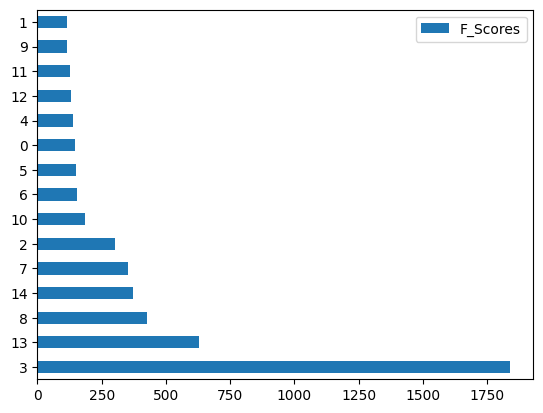

In [ ]:

ns_df_sorted.plot(kind = 'barh')

### Задание 10

In [ ]:
X_test_new = X_test[['balance','housing','duration','campaign','pdays','previous','age','contact_cellular','contact_unknown','month_mar','month_may','month_oct','month_sep',
                    'poutcome_success','poutcome_unknown']]
X_train_new = X_train[['balance','housing','duration','campaign','pdays','previous','age','contact_cellular','contact_unknown','month_mar','month_may','month_oct','month_sep',
                    'poutcome_success','poutcome_unknown']]

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train_new)
X_train_scaled = scaler.transform(X_train_new)
X_test_scaled = scaler.transform(X_test_new)

print(X_test_scaled[:, 0].mean())  # для признака balance

0.46823674223097866


# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [ ]:
# обучите логистическую регрессию и рассчитайте метрики качества
from sklearn import linear_model #линейные модели

log_reg = linear_model.LogisticRegression(solver='sag', max_iter=1000, random_state=42)
#Обучаем модель, минизируя logloss
log_reg.fit(X_test_scaled, y_test)


#Делаем предсказание вероятностей
y_pred_proba = np.round(log_reg.predict_proba(X_test_scaled), 2)
#Делаем предсказание класса
y_pred = log_reg.predict(X_test_scaled)


In [ ]:
from sklearn import metrics #метрики

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1790
           1       0.83      0.72      0.77      1545

    accuracy                           0.80      3335
   macro avg       0.80      0.80      0.80      3335
weighted avg       0.80      0.80      0.80      3335



In [ ]:
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.80


### Задания 2,3,4

In [ ]:
# обучите решающие деревья, настройте максимальную глубину
from sklearn import tree #модели деревьев решения

dt_clf = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=6, #максимальная глубина
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART
dt_clf.fit(X_test_scaled, y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

In [ ]:
#Делаем предсказание класса для всего набора данных
y_pred = dt_clf.predict(X_test_scaled)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1790
           1       0.81      0.79      0.80      1545

    accuracy                           0.82      3335
   macro avg       0.81      0.81      0.81      3335
weighted avg       0.82      0.82      0.82      3335



In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

print(lr.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


### Задание 5

In [ ]:
# подберите оптимальные параметры с помощью gridsearch
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split':[2, 5, 7, 10],
              'max_depth':[3,5,7]
              }

grid_search_forest = GridSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs = -1
)
%time grid_search_forest.fit(X_test_scaled, y_test)
y_test_pred = grid_search_forest.predict(X_test_scaled)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
y_train_pred = grid_search_forest.predict(X_train_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_forest.best_params_))

CPU times: user 812 ms, sys: 126 ms, total: 939 ms
Wall time: 25.7 s
f1_score на обучающем наборе: 0.85
f1_score на тестовом наборе: 0.82
Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 2}


In [ ]:
#Создаем объект класса случайный лес
from sklearn import ensemble
rf11 = ensemble.RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    criterion='gini',
    min_samples_leaf=5,
    random_state=42
)
#Обучаем модель
rf11.fit(X_train_scaled, y_train)
#Выводим значения метрики
y_train_pred = rf11.predict(X_train_scaled)
print(metrics.classification_report(y_train, y_train_pred))
y_test_pred = rf11.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3634
           1       0.84      0.86      0.85      3136

    accuracy                           0.86      6770
   macro avg       0.86      0.86      0.86      6770
weighted avg       0.86      0.86      0.86      6770

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1790
           1       0.83      0.72      0.77      1545

    accuracy                           0.80      3335
   macro avg       0.80      0.80      0.80      3335
weighted avg       0.80      0.80      0.80      3335



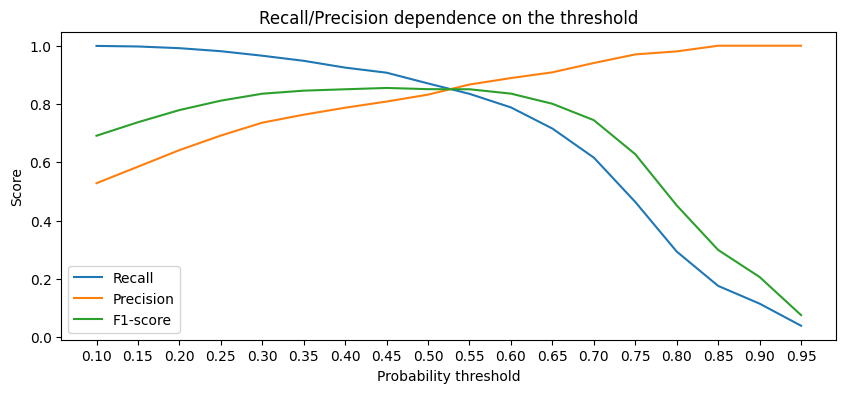

In [ ]:
#Нас интересует только вероятность класса (второй столбец)
y_test_proba_pred = rf11.predict_proba(X_test_scaled)[:, 1]
#Для удобства завернем numpy-массив в pandas Series
y_test_proba_pred = pd.Series(y_test_proba_pred)
#Создадим списки, в которых будем хранить значения метрик
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #В противном случае - к классу 0
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y_test, y_test_pred))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))

#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')

#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
#Даем графику название и подписи осям
ax.set_title('Recall/Precision dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
ax.set_xticks(thresholds)
ax.legend();

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(learning_rate = 0.05,
n_estimators = 300,
min_samples_leaf = 5,
max_depth = 5,
random_state = 42)

gbr.fit(X_test_scaled, y_test)
#Выводим значения метрики
y_train_pred = gbr.predict(X_train_scaled)
print(metrics.classification_report(y_train, y_train_pred))
y_test_pred = gbr.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_pred))

# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [ ]:
# обучите на ваших данных случайный лес

### Задания 2 и 3

In [ ]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом

### Задание 4

In [ ]:
from typing import Any
# объедините уже известные вам алгоритмы с помощью стекинга
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression

estimators = [
    ('lg', linear_model.LogisticRegression(solver='sag', max_iter=1000, random_state=42)),
    ('dt',  tree.DecisionTreeClassifier(criterion='entropy',max_depth=6, random_state=42)),
    ('gbr', GradientBoostingRegressor(learning_rate = 0.05, n_estimators = 300, min_samples_leaf = 5, max_depth = 5, random_state = 42))
]

reg = StackingRegressor(estimators=estimators,final_estimator=regressor)
# Обучаем модель
reg.fit(X_test_scaled, y_test)

NameError: ignored

In [ ]:
# Формируем предсказание для тестовой выборки
y_pred_stack = reg.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

### Задание 5

In [ ]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

### Задания 6,7,8

In [ ]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna
!pip install optuna
import optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.3/225.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.9 MB/s eta 0:00:00


n_estimators = trial.suggest_int('n_estimators', 100, 200, 1);
max_depth = trial.suggest_int('max_depth', 10, 30, 1);
min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1).

In [ ]:
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf)
  # обучаем модель
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))

  return score

In [ ]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2023-08-05 14:01:21,608] A new study created in memory with name: RandomForestClassifier
[I 2023-08-05 14:01:22,965] Trial 0 finished with value: 0.8551659065890863 and parameters: {'n_estimators': 197, 'max_depth': 11, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8551659065890863.
[I 2023-08-05 14:01:24,439] Trial 1 finished with value: 0.8929242329367565 and parameters: {'n_estimators': 195, 'max_depth': 27, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.8929242329367565.
[I 2023-08-05 14:01:25,497] Trial 2 finished with value: 0.8425184487360653 and parameters: {'n_estimators': 173, 'max_depth': 10, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.8929242329367565.
[I 2023-08-05 14:01:26,756] Trial 3 finished with value: 0.8647123373569525 and parameters: {'n_estimators': 184, 'max_depth': 14, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.8929242329367565.
[I 2023-08-05 14:01:27,830] Trial 4 finished with value: 0.8621176470588235 and parameters: {'n_

CPU times: user 23.4 s, sys: 45.1 ms, total: 23.4 s
Wall time: 23.6 s


In [ ]:
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 135, 'max_depth': 30, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.92


In [ ]:
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42)
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test_scaled, y_test)))
y_test_pred = model.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.83
f1_score на тестовом наборе: 0.82


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1790
           1       0.83      0.72      0.77      1545

    accuracy                           0.80      3335
   macro avg       0.80      0.80      0.80      3335
weighted avg       0.80      0.80      0.80      3335

